### 5(c). Read a grayscale image and implement image segmentation using basic global thresholding algorithm.


#### Importing the Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Loading the Original Image

shape of the original image: (958, 798)


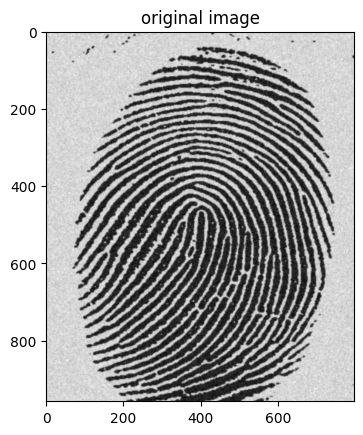

min pixel intensity: 29
max pixel intensity: 224


In [3]:
original_image = cv2.imread('./images/finger_print.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Function for Basic Global Thresholding

In [5]:
def basic_global_thresholding(image, initial_threshold=128, epsilon=0.5):
    T = initial_threshold
    while True:
        #separete pixels
        higher_group = image[image > T]
        lower_group  = image[image <= T]
        
        #avoid division by zero
        if len(higher_group)==0 or len(lower_group)==0:
            break
        
        #calculate means of each group 
        higher_group_mean = np.mean(higher_group)
        lower_group_mean = np.mean(lower_group)
        
        #update threshold
        T_new = (higher_group_mean + lower_group_mean)/2
        
        #check for covergence
        if abs(T_new - T) < epsilon:
            break
        T = T_new
        
    #Apply the final threshold
    binary_image = np.where(image > T, 255, 0).astype(np.uint8)
    return binary_image, T    

### Apply the Thresholding

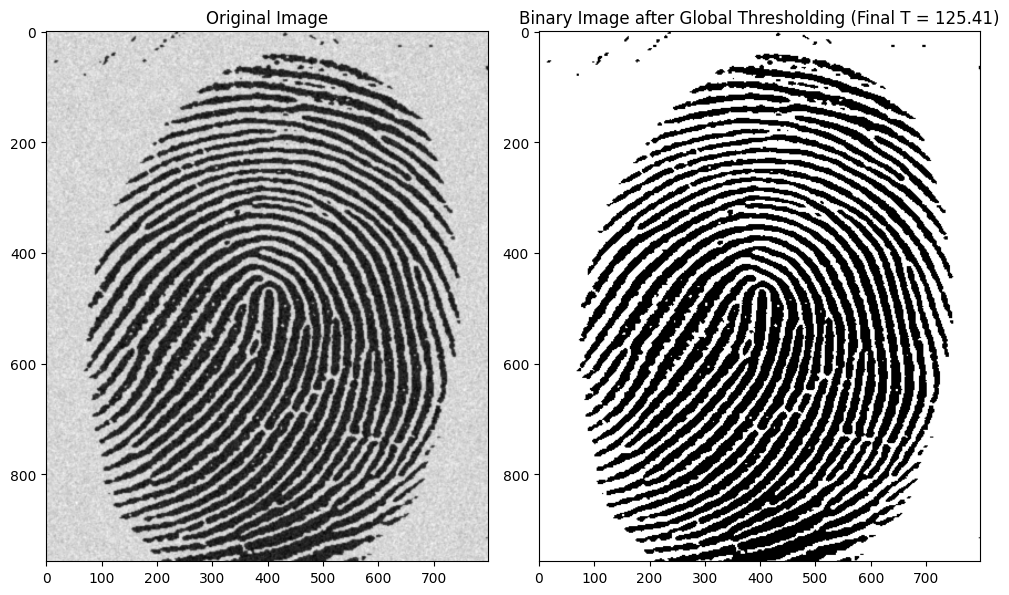

In [7]:
binary_image, final_threshold = basic_global_thresholding(original_image)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image after Global Thresholding (Final T = {final_threshold:.2f})')

plt.tight_layout()
plt.show()
